<center><h1> </h1></center>
<center><h1>Aprendendo Matemática com Python</h1></center>
<center><h3>Fernando Deeke Sasse e Sidnei Furtado Costa</h3></center>
<center><h3>CCT - UDESC</h3></center>
<center><h2>Séries de Fourier com  Python</h2></center>

1. [Introdução](#introducao)
2. [Onda Quadrada](#onda_quadrada)


<h3 id="introducao">1. Introdução</h3>

Uma função periódica $ f(t) $ com período $ T $ pode ser expressa como:

$$
f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos(2\pi n t/T) + b_n \sin(2\pi n t/T) \right)\,,
$$

sendo os coeficientes $ a_n $ e $ b_n $ calculados por:

$$
a_n = \frac{2}{T} \int_{-T/2}^{T/2} f(x) \cos(2\pi n t/T) \, dx\,,
$$

$$
b_n = \frac{2}{T} \int_{-T/2}^{T/2} f(x) \sin(2\pi n t/T) \, dx\,.
$$

---

<h3 id="onda_quadrada">2. Onda Quadrada</h3>
Consideremos uma onda quadrada de período $T=2$. Determinaremos:

(i) Os coeficientes $a_n$ e $b_n$,
(ii) O gráfico das somas parciais de Fourier,
(iii) O espectro de Fourier.

In [275]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Um modo de construir a função é o seguinte:

In [278]:
def square_wave(t):
    return 1/2*(1+np.sign(np.sin(2 * np.pi * t / T)))

Façamos o gráfico correspondente:

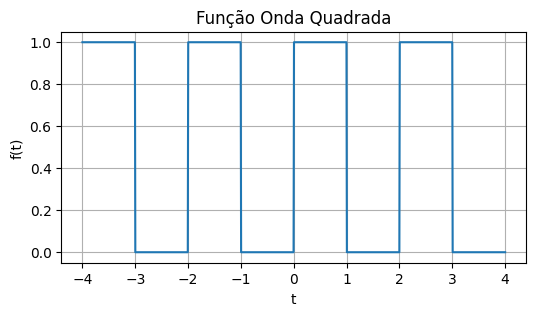

In [312]:
T =2
t = np.linspace(-4, 4, 1000)
y = square_wave(t)

plt.figure(figsize=(6, 3))
plt.plot(t, y)
plt.title('Função Onda Quadrada')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.show()

Façamos a expansão de Fourier, visualisando as diferentes aproximações.Inicialmente defimos um função que calcula os coeficientes de Fourier por meio de integração numérica:

In [284]:
def fourier_coefficients(f, N, T):
    t = np.linspace(0, T, 10000)
    a0 = (2 / T) * np.trapz(f(t), t)
    # Set a0 to zero if its absolute value is less than 1e-4
    if abs(a0) < 1e-4:
        a0 = 0.0
    an = []
    bn = []
    for n in range(1, N+1):
        an_value = (2 / T) * np.trapz(f(t) * np.cos(2 * np.pi * n * t / T), t)
        bn_value = (2 / T) * np.trapz(f(t) * np.sin(2 * np.pi * n * t / T), t)
        an.append(an_value)
        bn.append(bn_value)
    an = np.array(an)
    bn = np.array(bn)
    # Set coefficients with absolute values less than 1e-4 to zero
    an[np.abs(an) < 1e-4] = 0.0
    bn[np.abs(bn) < 1e-4] = 0.0
    return a0, an, bn

Por exemplo

In [287]:
T = 2
N = 20
t =   np.linspace(0, T, 1000)
a0, an, bn = fourier_coefficients(square_wave, 5, T)
print(a0,an,bn)

0.9999499949995001 [0. 0. 0. 0. 0.] [0.63661977 0.         0.21220658 0.         0.12732393]


In [290]:
def fourier_series(t, a0, an, bn, N,T):
    fs = a0 / 2
    for n in range(1, N+1):
        fs += an[n-1] * np.cos(2*np.pi*n*t/T) + bn[n-1] * np.sin(2*np.pi*n*t/T)
    return fs

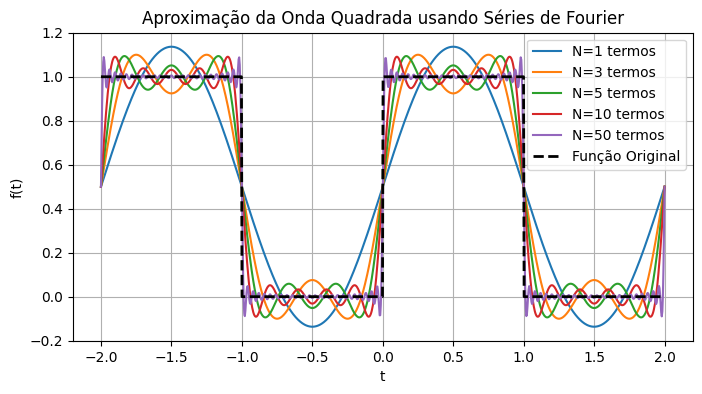

In [310]:
N_values = [1, 3, 5, 10, 50]
plt.figure(figsize=(8, 4))
t =  np.linspace(-2, 2, 1000)
for N in N_values:
    a0, an, bn = fourier_coefficients(square_wave, N,T)
    f_approx = fourier_series(t, a0, an, bn, N,T)
    plt.plot(t, f_approx, label=f'N={N} termos')

plt.plot(t, square_wave(t), label='Função Original', color='black', linewidth=2, linestyle='--')
plt.title('Aproximação da Onda Quadrada usando Séries de Fourier')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

In [294]:
#Erro quadrático médio:
def mean_squared_error(f_original, f_approx):
    return np.mean((f_original - f_approx) ** 2)

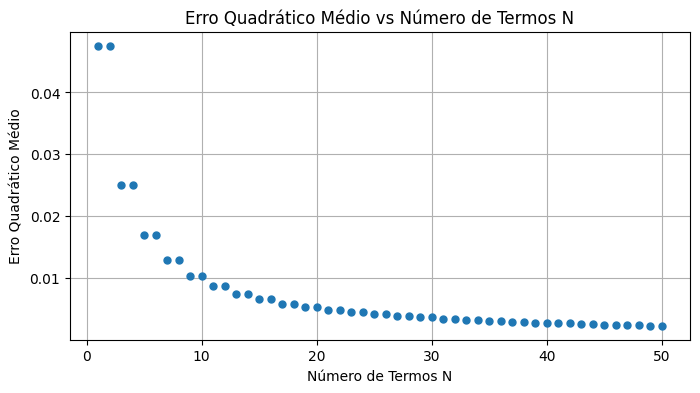

In [296]:
errors = []
N_range = range(1, 51)
T = 2
for N in N_range:
    a0, an, bn = fourier_coefficients(square_wave, N,T)
    f_approx = fourier_series(t, a0, an, bn, N,T)
    mse = mean_squared_error(square_wave(t), f_approx)
    errors.append(mse)

plt.figure(figsize=(8, 4))
# plt.plot(N_range, errors, marker='o', color = 'black')
plt.plot(N_range, errors, marker='o', linestyle='None', markersize=5)
# plt.scatter(N_range, errors, marker='o', s=25)
plt.title('Erro Quadrático Médio vs Número de Termos N')
plt.xlabel('Número de Termos N')
plt.ylabel('Erro Quadrático Médio')
plt.grid(True)
plt.show()

In [297]:
# Definindo o número máximo de harmônicos
N_max = 20

# Calculando os coeficientes de Fourier
a0, an, bn = fourier_coefficients(square_wave, N_max, T)

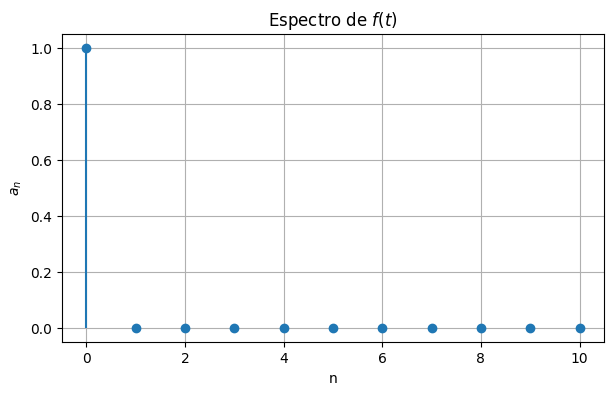

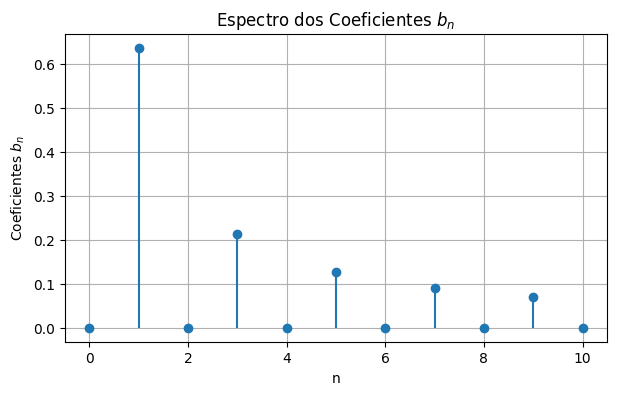

In [304]:
# Plotando o espectro dos coeficientes an
N_max = 10
a0, an, bn = fourier_coefficients(square_wave, N_max, T)
n_values = np.arange(0, N_max+1)
an_all = np.concatenate(([a0], an))
bn_all = np.concatenate(([0], bn))

plt.figure(figsize=(7, 4))
plt.stem(n_values, an_all, basefmt=" ")
plt.title('Espectro de $f(t)$')
plt.xlabel('n')
plt.ylabel('$a_n$')
plt.grid(True)
plt.show()

# Plotando o espectro dos coeficientes bn
plt.figure(figsize=(7, 4))
plt.stem(n_values, bn_all, basefmt=" ")
plt.title('Espectro dos Coeficientes $b_n$')
plt.xlabel('n')
plt.ylabel('Coeficientes $b_n$')
plt.grid(True)
plt.show()